Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, QuantileRegressor, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.manifold import TSNE
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# !pip install ipywidgets                   #descomentar si falta el paquet
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")


# Funcio per a llegir dades en format csv

url = 'https://raw.githubusercontent.com/AlbertRoca29/Datasets/main/datasets/mushrooms.csv'

def load_dataset(path):
    dataset = pd.read_csv(url, header=0, delimiter=',')
    return dataset

dataset = load_dataset(url)

Primera visualització del dataset per coneixer les variables i decidir que fer.


| Name | Variables que pot pendre|
|-:|:-|
cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s
cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises| bruises=t,no=f
odor| almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment| attached=a,descending=d,free=f,notched=n
gill-spacing| close=c,crowded=w,distant=d
gill-size| broad=b,narrow=n
gill-color| black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape| enlarging=e,tapering=t
stalk-root| bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type| partial=p,universal=u
veil-color| brown=n,orange=o,white=w,yellow=y
ring-number| none=n,one=o,two=t
ring-type| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d 
class| edible=e, poisonous=p

In [ ]:
pd.set_option('display.max_columns', None)
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


El que veiem més pràctic fer, és crear un classifier , que identifiqui els bolets verinosos, per tant, la variable a predir és "class"

In [ ]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Montar la base de dades

Al dataset.describe() hem pogut veure que el nombre de unique values és menor al que en teoria pot pendre (segons la web).
Per exemple, la columna veil-type només té un possible valor i per tant, no ens serveix.

In [ ]:
print('%-27s %-48s %s'%('Nom','Possibles valors', 'nombre'),
      '-'*85)
_=[print('%-27s %-50s %d'%(col,dataset[col].unique(),len(dataset[col].unique()))) for col in dataset]

Nom                         Possibles valors                                 nombre -------------------------------------------------------------------------------------
class                       ['p' 'e']                                          2
cap-shape                   ['x' 'b' 's' 'f' 'k' 'c']                          6
cap-surface                 ['s' 'y' 'f' 'g']                                  4
cap-color                   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']          10
bruises                     ['t' 'f']                                          2
odor                        ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']              9
gill-attachment             ['f' 'a']                                          2
gill-spacing                ['c' 'w']                                          2
gill-size                   ['n' 'b']                                          2
gill-color                  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']  12
stalk-shape       

La variable veil-type la borrem, la variable a predir class: Poisonous  = 1 , Eatable = 0

In [ ]:
X = dataset.drop(['class','veil-type'],axis=1)
y = dataset['class'] == 'p' # class: Poisonous  = 1 , Eatable = 0 

Ara converteixo, totes les columnes en dummies, no utilitzo el mínim nombre de dummies (que seria amb el drop_first activat) ja que penso que és més visual d'aquesta manera. Tot i que no aconsegueixi cap millora significativa.



In [ ]:
X_dummy = pd.get_dummies(X,columns=X.columns) #drop_first=True)
X_dummy.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3)

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

mm = make_pipeline(StandardScaler(), MinMaxScaler())

X_norm = mm.fit_transform(X_dummy)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)
# X_train = mm.fit_transform(X_train)
# X_test = mm.transform(X_test)

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,matriu=False,report=False):
    print('%-50s Accuracy Score: %.4f\n' % (classifier,accuracy_score(y_test,classifier.predict(X_test))))
    if(report): print('Classification Report:\n{}'.format(classification_report(y_test,classifier.predict(X_test))))
    if(matriu): print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

Veiem si les diferents classes estan balancejades.

In [ ]:
print(sum(y)/y.shape[0])

0.48202855736090594


Un 48.2% del bolets del dataset són verinosos. No caldrà utilitzar cap estrategia per balancejar el dataset

# Classifier amb moltes variables.

In [ ]:
models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]


for classifier in models:  
    classifier.fit(X_train,y_train)
    print_score(classifier,X_train,y_train,X_test,y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

SVC()                                              Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

LinearSVC()                                        Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

Perceptron()                                       Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

SGDClassifier()                                    Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

LinearDiscriminantAnalysis()                       Accuracy Score: 0.9996

Confusion Matrix:
[[1232    0]
 [   1 1205]]

KNeighborsClassifier()                             Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

GaussianNB()                                       Accuracy Score: 0.9565

Confusion Matrix:
[[1126  106]
 [   0 1206]]

DecisionTreeClassifier(criterion

LogisticRegression             [0.88515 0.88515 0.88515 0.87777 0.93314 0.98031 0.98031 0.98031 0.98031 0.98031 0.98031 0.98031 0.97498 0.97498 0.98031 0.98031 0.98031 0.98031]
SVC                            [0.88515 0.88515 0.88515 0.89541 0.93314 0.98031 0.98031 0.98031 0.98031 0.98072 0.98072 0.98975 0.99426 0.99426 0.99754 0.99754 1.      1.     ]
LinearSVC                      [0.88515 0.88515 0.88515 0.87777 0.93314 0.98031 0.98031 0.98031 0.97498 0.97539 0.97539 0.98072 0.97498 0.97498 0.97498 0.97498 0.97498 0.97498]
Perceptron                     [0.88515 0.78384 0.87121 0.86341 0.93314 0.9758  0.9758  0.98031 0.93765 0.97047 0.95365 0.98031 0.97498 0.97539 0.9639  0.97498 0.97662 0.97129]
SGDClassifier                  [0.88515 0.88515 0.88515 0.88515 0.92781 0.98031 0.98031 0.98031 0.98031 0.98031 0.98031 0.98031 0.98482 0.98482 0.98482 0.98482 0.98482 0.98482]
LinearDiscriminantAnalysis     [0.88515 0.88515 0.88515 0.88515 0.93314 0.97498 0.97047 0.96596 0.96596 0.96596 0.9

(0.825, 1.001)

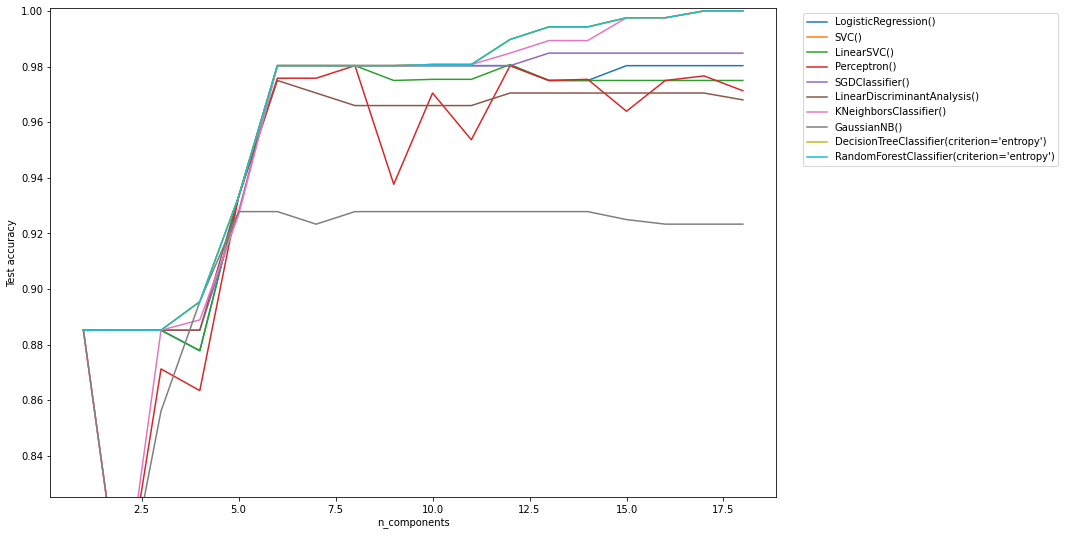

In [ ]:
plt.figure(figsize=(13,9))
def k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final):
    selector = [0] + [SelectKBest(score_func=chi2, k=i) for i in range(1,n_final+1)]
    acc =[]
    for i in range(1,n_final+1):
        X_train_r = selector[i].fit_transform(X_train,y_train)
        X_test_r = selector[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        acc.append(accuracy_score(y_test,classifier.predict(X_test_r)))
    plt.plot(range(1,n_final+1),acc,label = classifier)
    print(type(classifier).__name__.ljust(30, ' '),np.array(acc))


np.set_printoptions(precision=5, linewidth=np.inf)
for classifier in models:  
    k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,18)
np.set_printoptions(precision=None, linewidth= None)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.ylim([0.825, 1.001])

Es pot veure com tenim un molt bon primer component, i que amb 6 components trobem una accuracy superior al 97.5% en 9 dels 10 models.

Per 4 models, en concret els models:

    - SVC(kernel='rbf'),
    - KNeighborsClassifier(n_neighbors = 5),
    - DecisionTreeClassifier(criterion='entropy'),
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
veiem que segueix pujant l'accuracy de manera força constant i a les 14 o 15 iteracions, supera el 99% d'accuracy i abans de les 20 serà un model tan bo com si estiguessim treballant amb tota la base de dades.

Primer de tot , vull visualitzar els resultats amb el millor atribut.

In [ ]:
BK1 = SelectKBest(score_func=chi2,k=1)
BK1.fit(X_train,y_train)
s = BK1.get_support()

# Com és un sol atribut , amb un sol model en tenim prou.
LR = LogisticRegression()
LR.fit(X_train[:,s],y_train)
print_score(LR,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 0.8852

Confusion Matrix:
[[ 990  242]
 [  38 1168]]



Em sembla super interessant que un sol atribut pugui predir tan bé si els bolets son verinosos o no, així que vull detectar de quina variable es tracta.

odor_n
[[-4.86348]]


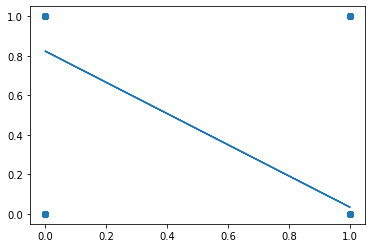

In [ ]:
index = np.where(s)[0]
print(X_dummy.columns[index][0])

y_values = LR.predict_proba(X_test[:,index])[:,1] 
plt.plot(X_test[:,index], y_values)
plt.scatter(X_test[:,index], y_test)
print(LR.coef_)

odor_n correspon als bolets que no fan olor. Per tant, els bolets que no fan olor són molt més propensos a ser verinosos. Si fan una olor peculiar, sembla que és més probable que siguin comestibles.

Ara , ja per curiositat, vull veure quins són els següents atributs que classifiquen millor per si sols. Penso que tot i computacionalment no ser molt interessant a la pràctica sembla lo més interessant, la gent busca un sol indicador per veure si són perillosos o no. A veure si surt algo més interessant.

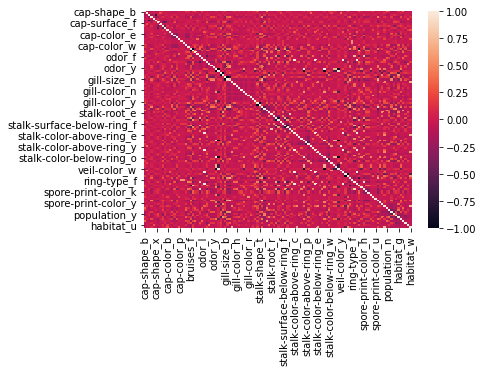

In [ ]:
c = X_dummy.corr()
sns.heatmap(c)

In [ ]:
LR = LogisticRegression()


D = {}
for i in range(X_train.shape[1]):
    LR.fit(X_train[:,i].reshape(-1, 1),y_train)
    D[X_dummy.columns[i]] = [accuracy_score(y_test,LR.predict(X_test[:,i].reshape(-1, 1))) , sum((LR.predict(X_test[:,i].reshape(-1, 1))!=y_test)[y_test])/X_train.shape[0] ,int(np.sign(LR.coef_))]

print("Nom \t\t\t\t Accuracy\tFalsos Comestibles \tSigne de la correlació\n","-"*90)
_= [print("%-32s %.5f\t%.5f\t\t\t %d"%(i,j[0],j[1],j[2])) for i,j in dict(sorted(D.items(), key=lambda item: item[1][0],reverse=True)).items() if j[0]>0.75]

Nom 				 Accuracy	Falsos Comestibles 	Signe de la correlació
 ------------------------------------------------------------------------------------------
odor_n                           0.88515	0.00668			 -1
odor_f                           0.78384	0.09268			 1
ring-type_p                      0.78015	0.04326			 -1
stalk-surface-above-ring_k       0.76046	0.09479			 1
bruises_f                        0.75554	0.03377			 1
bruises_t                        0.75554	0.03377			 -1
gill-size_b                      0.75513	0.09216			 -1
gill-size_n                      0.75513	0.09216			 1
stalk-surface-below-ring_k       0.75513	0.09849			 1


Aquí veiem els resultats utilitzant 6 atributs

In [ ]:
m = SelectKBest(score_func=chi2,k=6)
m.fit(X_train,y_train)
s = m.get_support()
for classifier in models:  
    classifier.fit(X_train[:,s],y_train)
    print_score(classifier,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 0.9803

Confusion Matrix:
[[1211   21]
 [  27 1179]]

SVC()                                              Accuracy Score: 0.9803

Confusion Matrix:
[[1211   21]
 [  27 1179]]

LinearSVC()                                        Accuracy Score: 0.9803

Confusion Matrix:
[[1211   21]
 [  27 1179]]

Perceptron()                                       Accuracy Score: 0.9758

Confusion Matrix:
[[1211   21]
 [  38 1168]]

SGDClassifier()                                    Accuracy Score: 0.9803

Confusion Matrix:
[[1211   21]
 [  27 1179]]

LinearDiscriminantAnalysis()                       Accuracy Score: 0.9750

Confusion Matrix:
[[1211   21]
 [  40 1166]]

KNeighborsClassifier()                             Accuracy Score: 0.9803

Confusion Matrix:
[[1211   21]
 [  27 1179]]

GaussianNB()                                       Accuracy Score: 0.9278

Confusion Matrix:
[[1232    0]
 [ 176 1030]]

DecisionTreeClassifier(criterion

Aquí veiem el resultat amb 18 atributs

In [ ]:
m = SelectKBest(score_func=chi2,k=18)
m.fit(X_train,y_train)
s = m.get_support()
for classifier in models:  
    classifier.fit(X_train[:,s],y_train)
    print_score(classifier,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)

LogisticRegression()                               Accuracy Score: 0.9803

Confusion Matrix:
[[1222   10]
 [  38 1168]]

SVC()                                              Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

LinearSVC()                                        Accuracy Score: 0.9750

Confusion Matrix:
[[1222   10]
 [  51 1155]]

Perceptron()                                       Accuracy Score: 0.9713

Confusion Matrix:
[[1213   19]
 [  51 1155]]

SGDClassifier()                                    Accuracy Score: 0.9848

Confusion Matrix:
[[1222   10]
 [  27 1179]]

LinearDiscriminantAnalysis()                       Accuracy Score: 0.9680

Confusion Matrix:
[[1192   40]
 [  38 1168]]

KNeighborsClassifier()                             Accuracy Score: 1.0000

Confusion Matrix:
[[1232    0]
 [   0 1206]]

GaussianNB()                                       Accuracy Score: 0.9233

Confusion Matrix:
[[1221   11]
 [ 176 1030]]

DecisionTreeClassifier(criterion

Es pot veure que tots van genial i que triguen poc, així que l'objectiu de la pràctica passara a ser aconseguir reduir l'espai més que trobar un bon model , ja que un bon model és fàcil de aconseguir.

# PCA
Anteriorment , he pogut veure que agafant 6 atributs puc aconseguir un bon model, i agafant-ne 18 un exelent model.

Però ara vull veure si agafant només 2 o 3 utilitzant un PCA es pot aconseguir un model tan bó com els anteriors.

L'objectiu és saber a quin nombre de components he de reduir l'espai, per aconseguir una bona accuracy, si amb 2 o 3 són suficients es podrà fer un plot per visualitzar-ho.

Per això creare diferents subsets. Les variables que trio per a cada un són aconseguides a partir d'un PCA per a cada nombre de variables.

In [ ]:
def pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final,print_all=True):
    pca = [0,0]+[PCA(n_components=i) for i in range(2,n_final+1)]
    acc =[]
    for i in range(2,n_final+1):
        X_train_r = pca[i].fit_transform(X_train)
        X_test_r = pca[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        acc.append(accuracy_score(y_test,classifier.predict(X_test_r)))
    if(print_all):
        print(type(classifier).__name__.ljust(30, ' '),np.array(acc))
    plt.plot(range(2,n_final+1),acc,label = classifier)
    

LogisticRegression             [0.88064 0.87982 0.85644 0.95529 0.95939 0.96267]
SVC                            [0.92863 0.95406 0.97621 0.98811 0.98975 0.99467]
LinearSVC                      [0.88228 0.88802 0.87285 0.95406 0.95816 0.96185]
Perceptron                     [0.89541 0.86054 0.82445 0.93847 0.90935 0.95775]
SGDClassifier                  [0.88966 0.88269 0.89377 0.92945 0.95734 0.96473]
LinearDiscriminantAnalysis     [0.88228 0.88925 0.87941 0.93847 0.94463 0.95693]
KNeighborsClassifier           [0.96062 0.98646 0.99426 0.99795 1.      0.99836]
GaussianNB                     [0.88638 0.88925 0.88966 0.89541 0.8991  0.89869]
DecisionTreeClassifier         [0.96021 0.98646 0.99385 0.99508 0.99877 0.99918]
RandomForestClassifier         [0.96144 0.99098 0.99713 0.99877 0.99959 0.99959]


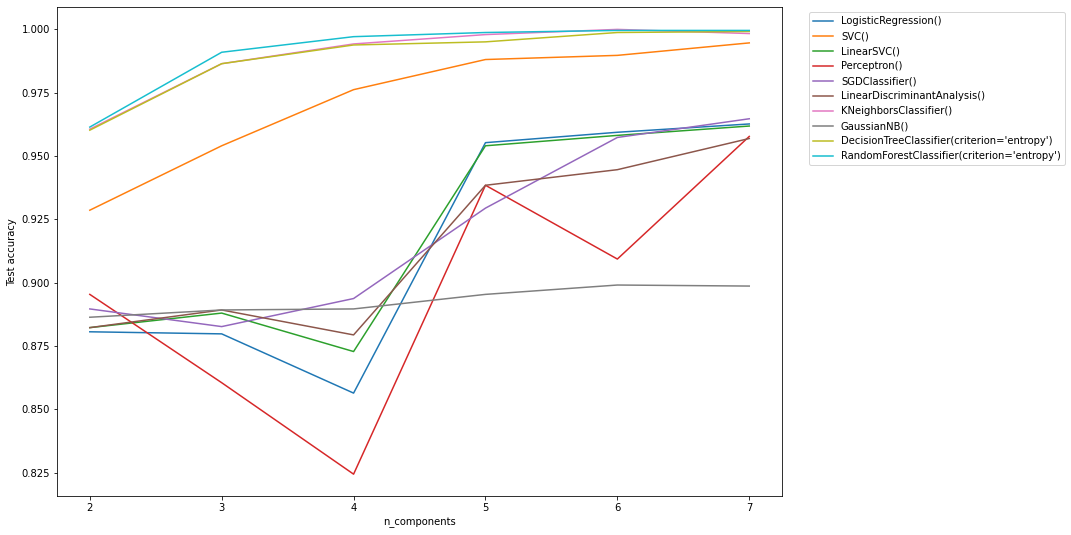

In [ ]:
plt.figure(figsize=(13,9))
models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]

for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 7)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))


En aquest cas veiem 3 models que destaquen clarament sobre la resta:

    - KNeighborsClassifier(n_neighbors = 5)
    - DecisionTreeClassifier(criterion='entropy')
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

Aquests models aconsegueixen una accuracy superior al 95% amb un PCA de dimensio 2, i un 99% amb un de dimensio 3.

En quarta posició estaria el SVC() que també el podrem considerar.

## Visualització gràfica dels PCA de dimensió 2 i 3.

per a dimensio 2, he aprofundit força

In [ ]:
def visualization_test(model):
    X_set, y_set = X_test_r, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.025),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.025))
    
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = 'rg'[i], label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

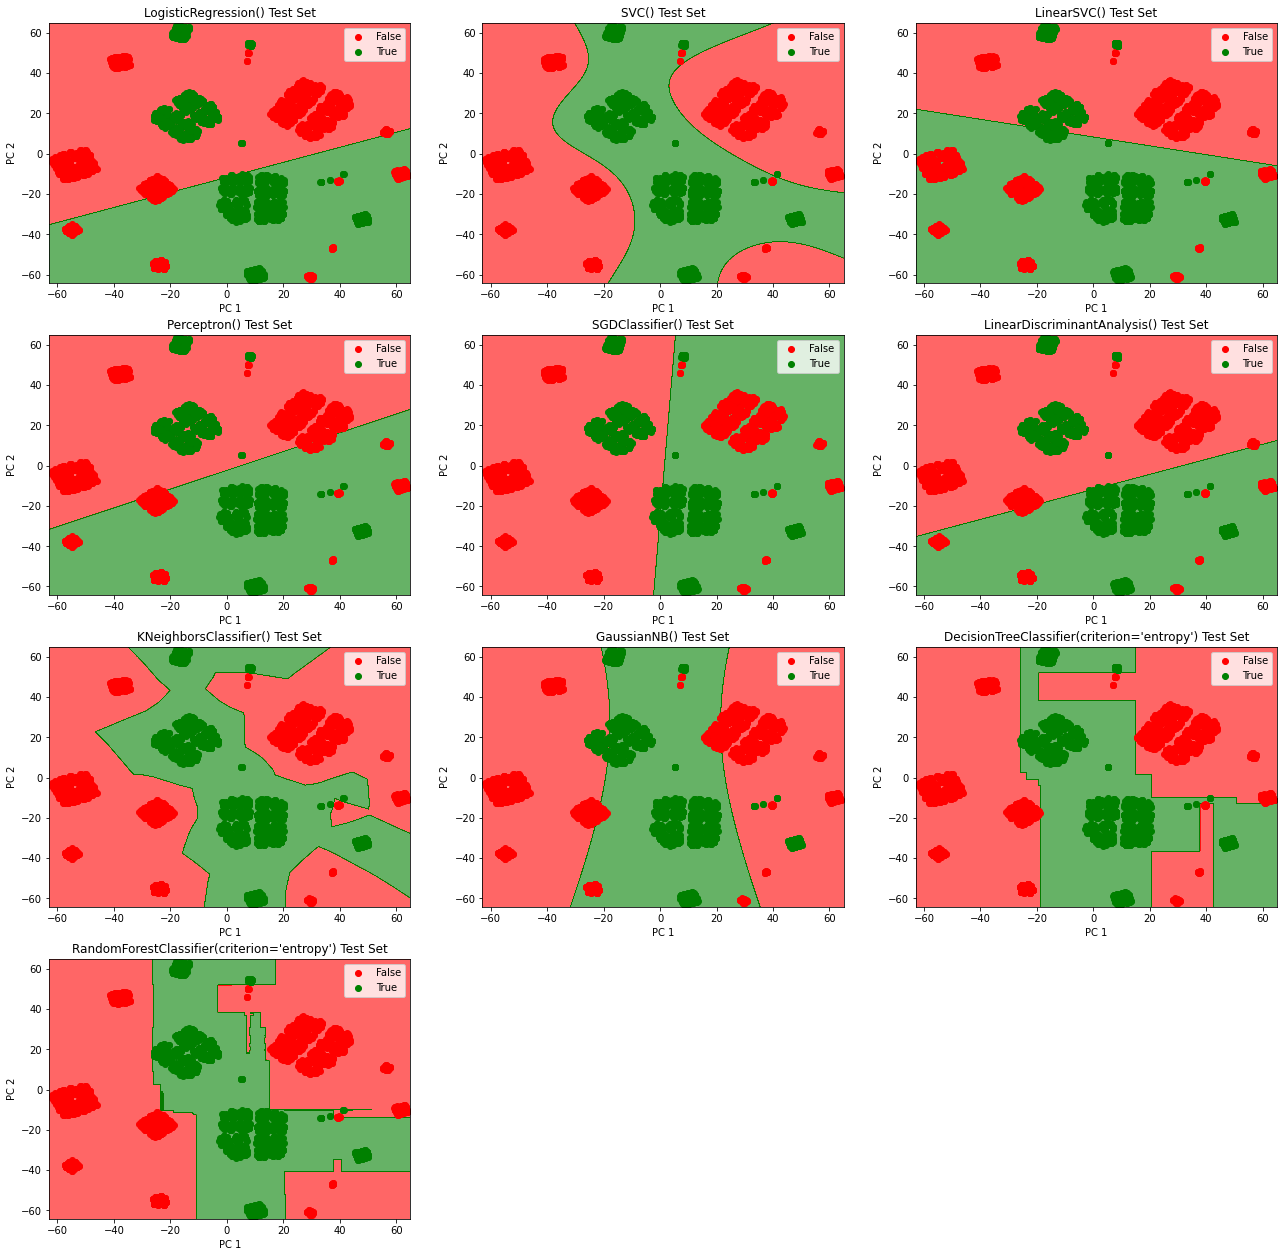

In [ ]:


models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]

fig = plt.figure(figsize=(22,22))
i = 1
for classifier in models: 
    pca = PCA(2) 
    X_train_r = pca.fit_transform(X_train)
    X_test_r = pca.transform(X_test)
    classifier.fit(X_train_r,y_train)
    ax = fig.add_subplot(4,3, i)
    i+=1
    visualization_test(classifier)
plt.show()

## TSNE

T-sne és un algoritme no supervisat, per tant, no podem avaluar-lo, però si visualitzar-lo.

Doncs poso com a objectiu aconseguir una visualització 2d i 3d i comparar-les amb les visualitzacions del PCA.

Aquí ens trobem per primer cop amb una execució lenta, la següent cela pot trigar uns minuts en executar-se.

**TSNE 2 dimensions** 

La següent cel·la l'he comentat ja que triga molt en executar-se i només m'ha servit per veure quins arguments en el tsne em poden anar millor.

In [ ]:
# tsne2 = TSNE(n_components=2,n_iter=1000, perplexity = 20) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=2000, perplexity = 20) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=1000, perplexity = 50) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=2000, perplexity = 50) 
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=1000, perplexity = 100)
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

# tsne2 = TSNE(n_components=2,n_iter=2000, perplexity = 100)
# X_tsne2 = tsne2.fit_transform(X_norm)
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
# plt.show()

Finalment em quedo amb n_iter = 1000 i perplexity = 50.

Tot i no ser d'aprenentatge supervisat, podem veure com funcionen els models en l'espai transformat. Per a cada model calcularem, laccuracy.

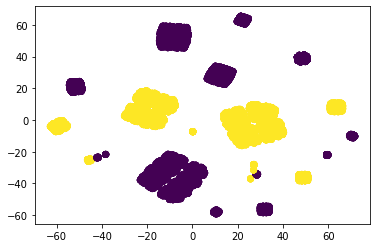

LogisticRegression()                               Accuracy Score: 0.6924

SVC()                                              Accuracy Score: 0.9885

LinearSVC()                                        Accuracy Score: 0.6674

Perceptron()                                       Accuracy Score: 0.5078

SGDClassifier()                                    Accuracy Score: 0.4922

LinearDiscriminantAnalysis()                       Accuracy Score: 0.6920

KNeighborsClassifier()                             Accuracy Score: 1.0000

GaussianNB()                                       Accuracy Score: 0.9176

DecisionTreeClassifier(criterion='entropy')        Accuracy Score: 1.0000

RandomForestClassifier(criterion='entropy')        Accuracy Score: 1.0000



In [ ]:
tsne2 = TSNE(n_components=2,n_iter=1000, perplexity = 50) # he augmentat la perplexity respecte l'estandar ja que l'estandar (30) està pensat per dataset molt petits.
X_tsne2 = tsne2.fit_transform(X_norm)
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)
plt.show()

X_train_r, X_test_r, y_train, y_test = train_test_split(X_tsne2, y, test_size=0.3)

models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]

acc = np.zeros((10,2))
i=0
for classifier in models:  
    classifier.fit(X_train,y_train)
    print_score(classifier,X_train,y_train,X_test,y_test)
    acc[i,0] = accuracy_score(y_test,classifier.predict(X_test))
    i+=1


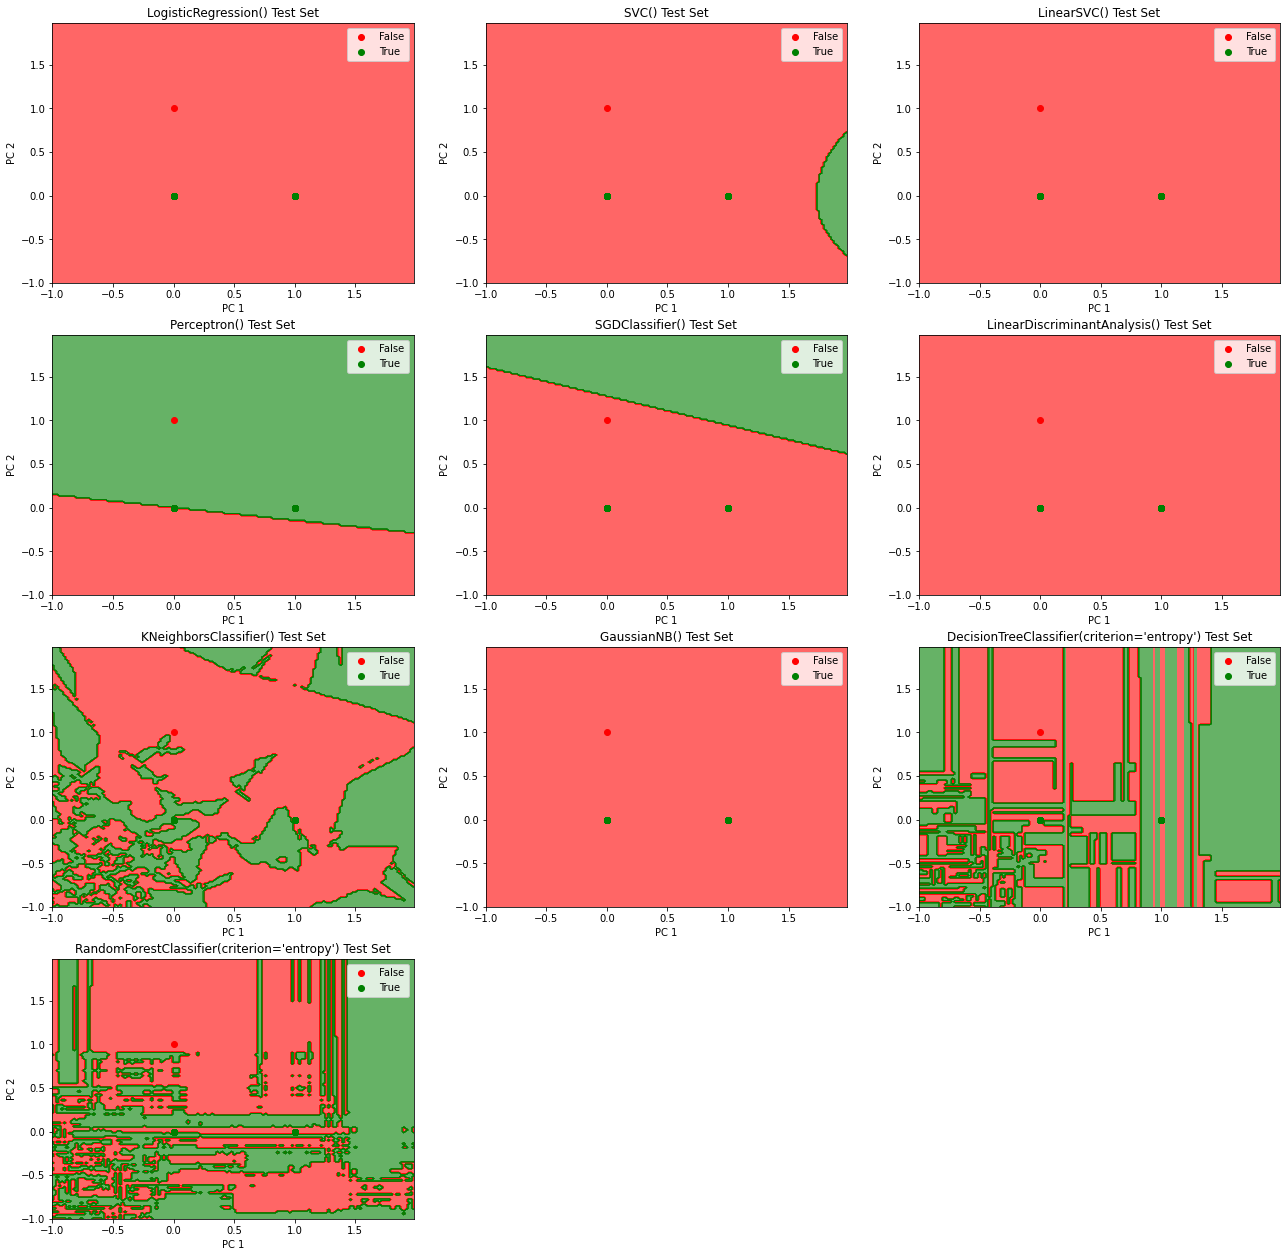

In [ ]:
fig = plt.figure(figsize=(22,22))
i = 1
for classifier in models:  
    classifier.fit(X_train_r, y_train)
    ax = fig.add_subplot(4,3, i)
    i+=1
    visualization_test(classifier)
plt.show()

TSNE 3 dimensions (aquest dura 3 o 4 vegades més, l'hagues pogut fer més ràpid però no he volgut sacrificar massa precisió)

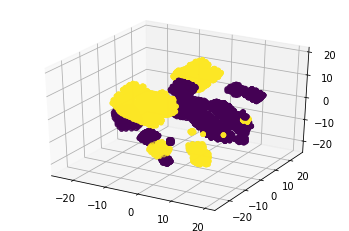

LogisticRegression()                               Accuracy Score: 0.7432

SVC()                                              Accuracy Score: 0.9975

LinearSVC()                                        Accuracy Score: 0.7404

Perceptron()                                       Accuracy Score: 0.5554

SGDClassifier()                                    Accuracy Score: 0.4225

LinearDiscriminantAnalysis()                       Accuracy Score: 0.7449

KNeighborsClassifier()                             Accuracy Score: 1.0000

GaussianNB()                                       Accuracy Score: 0.8913

DecisionTreeClassifier(criterion='entropy')        Accuracy Score: 1.0000

RandomForestClassifier(criterion='entropy')        Accuracy Score: 1.0000



In [ ]:
tsne3 = TSNE(n_components=3, n_iter=1000, perplexity = 50)

X_tsne3 = tsne3.fit_transform(X_norm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=y)
end = time.time()
plt.ion()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_tsne3, y, test_size=0.3)

models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]
i=0
for classifier in models:  
    classifier.fit(X_train,y_train)
    print_score(classifier,X_train,y_train,X_test,y_test)
    acc[i,1] = accuracy_score(y_test,classifier.predict(X_test))
    i+=1



In [ ]:
def plot_3d(elev, azim):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=y)
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(0, 90), azim=(0, 360))

interactive(children=(IntSlider(value=45, description='elev', max=90), IntSlider(value=180, description='azim'…

<function __main__.plot_3d(elev, azim)>

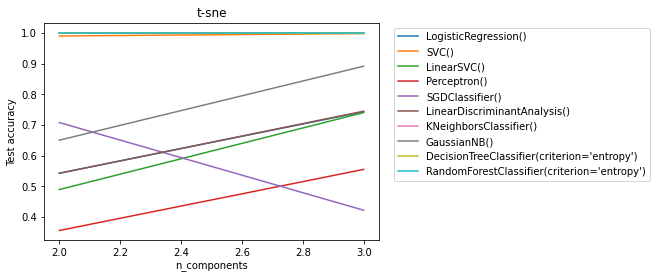

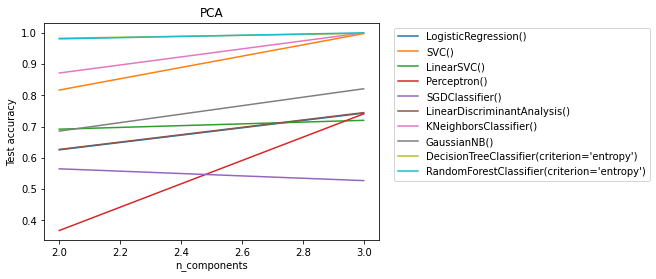

In [ ]:
for i in range(10):
    plt.plot(range(2,4),acc[i,:],label = models[i])

plt.title("t-sne")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]

for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 3,print=False)

plt.title("PCA")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))

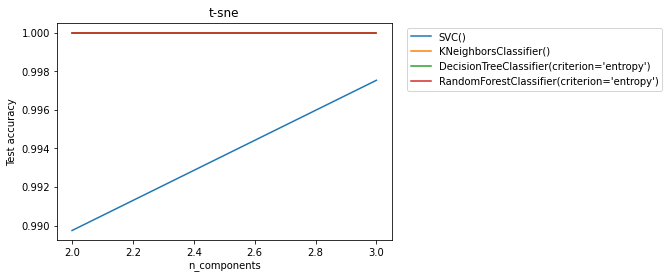

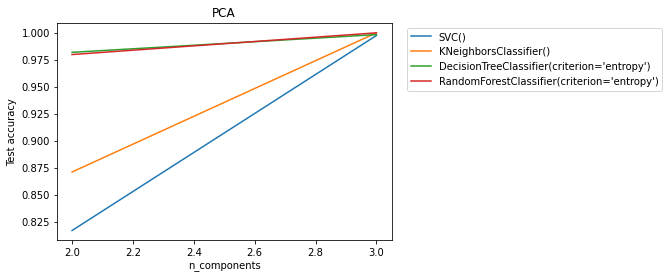

In [ ]:
models2 = [
    # LogisticRegression(),
    SVC(kernel='rbf'),
    # LinearSVC(), 
    # Perceptron(), 
    # SGDClassifier(),
    # LinearDiscriminantAnalysis(),  
    KNeighborsClassifier(n_neighbors = 5),
    # GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
]


L = [1,6,8,9]
for i in L:
    plt.plot(range(2,4),acc[i,:],label = models[i])

plt.title("t-sne")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

for classifier in models2:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 3,print=False)

plt.title("PCA")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))

Veiem que la major diferència per els millors models, és a dimensió 2, on ens trobem que en l'espai del TSNE aconsegueixen ja una accuracy "perfecte", mentre que en el pca, no passa fins a les 3 dimensions.

### Provem els models a aquests nous espais. 
Tot i ser un algoritme no supervisat , transforma tot l'espai i podem utilitzar el nou espai per probar els models.

Per fer-ho, utilitzarem altre cop, un plot per veure les evolucions en l'accuracy

In [ ]:
# X=pd.get_dummies(X,columns=X.columns) # ,drop_first=True)
# X.head()
# X.shape

# from sklearn.preprocessing import LabelEncoder
# Encoder_X = LabelEncoder() 
# for col in X.columns:

#     X[col] = Encoder_X.fit_transform(X[col])
#     # df['col1_num'] = df['col1'].apply(lambda x: ['first', 'second', 'third', 'fourth'].index(x))
# Encoder_y=LabelEncoder()
# y = Encoder_y.fit_transform(y)

# X.head()

i=8
n = len(X[X.columns[i]].unique())
j = 0
M = np.array(X[X.columns[i]].value_counts().reset_index())
while(j<n):
    if(M[j,1]/X.shape[0]<0.05):
        print(M[j,1]/X.shape[0])
    X = 
    # print(X.columns[i]+'_'+M[j,0]+' = ') #,X[X.columns[i]]==M[j,1])
    j+=1
    

# print(np.array(X[X.columns[8]].value_counts().reset_index()))

In [ ]:
X.mode()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X)[:,:10], y, test_size=0.9, random_state=42)
sc = preprocessing.StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

print_score(classifier,X_train,y_train,X_test,y_test)